# action1 使用catboot算法对mnist训练

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


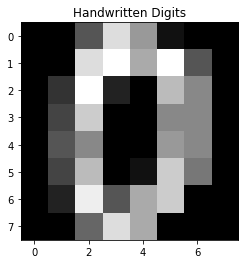

In [30]:
# -*- coding: utf-8 -*-
#加载相关包
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

def show_plt(images):
    # 将第一幅图像显示出来
    plt.gray()
    # 给图片添加名称
    plt.title('Handwritten Digits')
    # 设置要显示的图片
    plt.imshow(images)
    plt.show()

# 加载数据
digits = load_digits()
data = digits.data
# 数据探索，样本量
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])
show_plt(digits.images[0])


In [35]:
# -*- coding: utf-8 -*-
# 使用对称决策树catboost进行MNIST手写数字分类
#安装catboost包
# !pip install catboost
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# 加载数据
digits = load_digits()
data = digits.data

# 采用Z-Score规范化

ss = preprocessing.StandardScaler()
data1 = ss.fit_transform(data)

# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data1, digits.target, test_size=0.25, random_state=33)

# 创建cat分类器
model = CatBoostClassifier()
model.fit(train_x,train_y)

print('LR准确率: %0.4lf' % model.score(test_x, test_y))
# 保存模型
model.save_model('catboost_info/mnist.model')


[[ 0.         -0.33501649 -0.25345218 ...  0.71808148 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.46382335 ...  1.56568555  1.93967098
  -0.19600752]
 [ 0.         -0.33501649  0.37766131 ... -1.14664746 -0.5056698
  -0.19600752]
 ...
 [ 0.         -0.33501649  0.16729015 ...  0.8876023  -0.26113572
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.71808148 -0.26113572
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  2.18420506
  -0.19600752]]
Learning rate set to 0.080338
0:	learn: 2.1081562	total: 6.81ms	remaining: 6.8s
1:	learn: 1.9322680	total: 13.7ms	remaining: 6.82s
2:	learn: 1.7774833	total: 20.5ms	remaining: 6.8s
3:	learn: 1.6500901	total: 26.7ms	remaining: 6.64s
4:	learn: 1.5370755	total: 32.8ms	remaining: 6.53s
5:	learn: 1.4570902	total: 38.7ms	remaining: 6.41s
6:	learn: 1.3817977	total: 44.8ms	remaining: 6.36s
7:	learn: 1.3015051	total: 51.2ms	remaining: 6.35s
8:	learn: 1.2346354	total: 56.8ms	remaining: 6.25s
9:	learn: 1.1745324	tot

150:	learn: 0.0816795	total: 992ms	remaining: 5.58s
151:	learn: 0.0810211	total: 999ms	remaining: 5.57s
152:	learn: 0.0802328	total: 1s	remaining: 5.57s
153:	learn: 0.0794658	total: 1.01s	remaining: 5.57s
154:	learn: 0.0787567	total: 1.02s	remaining: 5.57s
155:	learn: 0.0784842	total: 1.03s	remaining: 5.57s
156:	learn: 0.0777741	total: 1.04s	remaining: 5.56s
157:	learn: 0.0771992	total: 1.04s	remaining: 5.56s
158:	learn: 0.0764336	total: 1.05s	remaining: 5.55s
159:	learn: 0.0758904	total: 1.06s	remaining: 5.54s
160:	learn: 0.0752098	total: 1.06s	remaining: 5.54s
161:	learn: 0.0746963	total: 1.07s	remaining: 5.54s
162:	learn: 0.0742346	total: 1.08s	remaining: 5.53s
163:	learn: 0.0737983	total: 1.08s	remaining: 5.53s
164:	learn: 0.0733663	total: 1.09s	remaining: 5.53s
165:	learn: 0.0726021	total: 1.1s	remaining: 5.53s
166:	learn: 0.0719786	total: 1.11s	remaining: 5.52s
167:	learn: 0.0715067	total: 1.11s	remaining: 5.52s
168:	learn: 0.0711702	total: 1.12s	remaining: 5.51s
169:	learn: 0.07

330:	learn: 0.0307429	total: 2.18s	remaining: 4.41s
331:	learn: 0.0305578	total: 2.19s	remaining: 4.41s
332:	learn: 0.0304076	total: 2.2s	remaining: 4.4s
333:	learn: 0.0302694	total: 2.2s	remaining: 4.39s
334:	learn: 0.0301405	total: 2.21s	remaining: 4.38s
335:	learn: 0.0300253	total: 2.21s	remaining: 4.38s
336:	learn: 0.0299154	total: 2.22s	remaining: 4.37s
337:	learn: 0.0297741	total: 2.23s	remaining: 4.36s
338:	learn: 0.0296372	total: 2.23s	remaining: 4.36s
339:	learn: 0.0295343	total: 2.24s	remaining: 4.35s
340:	learn: 0.0294141	total: 2.25s	remaining: 4.34s
341:	learn: 0.0293084	total: 2.25s	remaining: 4.33s
342:	learn: 0.0292380	total: 2.26s	remaining: 4.33s
343:	learn: 0.0291138	total: 2.26s	remaining: 4.32s
344:	learn: 0.0290184	total: 2.27s	remaining: 4.31s
345:	learn: 0.0289257	total: 2.27s	remaining: 4.3s
346:	learn: 0.0288094	total: 2.28s	remaining: 4.29s
347:	learn: 0.0287118	total: 2.29s	remaining: 4.28s
348:	learn: 0.0285750	total: 2.29s	remaining: 4.28s
349:	learn: 0.02

490:	learn: 0.0186278	total: 3.17s	remaining: 3.29s
491:	learn: 0.0185797	total: 3.18s	remaining: 3.28s
492:	learn: 0.0185352	total: 3.19s	remaining: 3.28s
493:	learn: 0.0185331	total: 3.19s	remaining: 3.27s
494:	learn: 0.0184685	total: 3.2s	remaining: 3.26s
495:	learn: 0.0184196	total: 3.21s	remaining: 3.26s
496:	learn: 0.0183572	total: 3.21s	remaining: 3.25s
497:	learn: 0.0183150	total: 3.22s	remaining: 3.24s
498:	learn: 0.0182876	total: 3.23s	remaining: 3.24s
499:	learn: 0.0182272	total: 3.23s	remaining: 3.23s
500:	learn: 0.0181795	total: 3.24s	remaining: 3.22s
501:	learn: 0.0181419	total: 3.24s	remaining: 3.22s
502:	learn: 0.0181001	total: 3.25s	remaining: 3.21s
503:	learn: 0.0180602	total: 3.25s	remaining: 3.2s
504:	learn: 0.0180098	total: 3.26s	remaining: 3.2s
505:	learn: 0.0179598	total: 3.27s	remaining: 3.19s
506:	learn: 0.0179015	total: 3.27s	remaining: 3.18s
507:	learn: 0.0178730	total: 3.28s	remaining: 3.17s
508:	learn: 0.0178449	total: 3.28s	remaining: 3.17s
509:	learn: 0.0

649:	learn: 0.0131842	total: 4.16s	remaining: 2.24s
650:	learn: 0.0131500	total: 4.17s	remaining: 2.24s
651:	learn: 0.0131101	total: 4.18s	remaining: 2.23s
652:	learn: 0.0130941	total: 4.18s	remaining: 2.22s
653:	learn: 0.0130658	total: 4.19s	remaining: 2.22s
654:	learn: 0.0130440	total: 4.2s	remaining: 2.21s
655:	learn: 0.0130177	total: 4.2s	remaining: 2.2s
656:	learn: 0.0130054	total: 4.21s	remaining: 2.2s
657:	learn: 0.0129765	total: 4.21s	remaining: 2.19s
658:	learn: 0.0129637	total: 4.22s	remaining: 2.18s
659:	learn: 0.0129506	total: 4.23s	remaining: 2.18s
660:	learn: 0.0129305	total: 4.23s	remaining: 2.17s
661:	learn: 0.0129039	total: 4.24s	remaining: 2.17s
662:	learn: 0.0128861	total: 4.25s	remaining: 2.16s
663:	learn: 0.0128693	total: 4.25s	remaining: 2.15s
664:	learn: 0.0128428	total: 4.26s	remaining: 2.15s
665:	learn: 0.0128142	total: 4.26s	remaining: 2.14s
666:	learn: 0.0127871	total: 4.27s	remaining: 2.13s
667:	learn: 0.0127581	total: 4.28s	remaining: 2.13s
668:	learn: 0.01

809:	learn: 0.0099488	total: 5.16s	remaining: 1.21s
810:	learn: 0.0099352	total: 5.17s	remaining: 1.2s
811:	learn: 0.0099088	total: 5.17s	remaining: 1.2s
812:	learn: 0.0099010	total: 5.18s	remaining: 1.19s
813:	learn: 0.0098848	total: 5.18s	remaining: 1.18s
814:	learn: 0.0098681	total: 5.19s	remaining: 1.18s
815:	learn: 0.0098469	total: 5.2s	remaining: 1.17s
816:	learn: 0.0098324	total: 5.2s	remaining: 1.17s
817:	learn: 0.0098137	total: 5.21s	remaining: 1.16s
818:	learn: 0.0097996	total: 5.22s	remaining: 1.15s
819:	learn: 0.0097807	total: 5.22s	remaining: 1.15s
820:	learn: 0.0097532	total: 5.23s	remaining: 1.14s
821:	learn: 0.0097318	total: 5.24s	remaining: 1.13s
822:	learn: 0.0097153	total: 5.24s	remaining: 1.13s
823:	learn: 0.0096995	total: 5.25s	remaining: 1.12s
824:	learn: 0.0096861	total: 5.26s	remaining: 1.11s
825:	learn: 0.0096730	total: 5.26s	remaining: 1.11s
826:	learn: 0.0096561	total: 5.27s	remaining: 1.1s
827:	learn: 0.0096487	total: 5.28s	remaining: 1.1s
828:	learn: 0.0096

990:	learn: 0.0078022	total: 6.35s	remaining: 57.7ms
991:	learn: 0.0077968	total: 6.36s	remaining: 51.3ms
992:	learn: 0.0077854	total: 6.36s	remaining: 44.9ms
993:	learn: 0.0077774	total: 6.37s	remaining: 38.5ms
994:	learn: 0.0077666	total: 6.38s	remaining: 32.1ms
995:	learn: 0.0077558	total: 6.38s	remaining: 25.6ms
996:	learn: 0.0077427	total: 6.39s	remaining: 19.2ms
997:	learn: 0.0077349	total: 6.4s	remaining: 12.8ms
998:	learn: 0.0077256	total: 6.41s	remaining: 6.41ms
999:	learn: 0.0077168	total: 6.41s	remaining: 0us
LR准确率: 0.9822


预测值是0,实际值是0


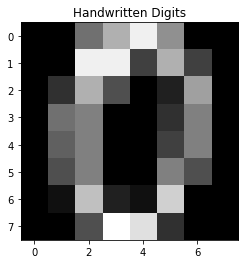

预测值是6,实际值是6


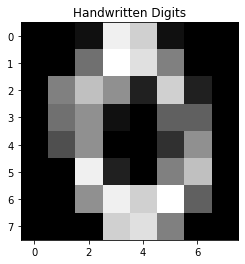

In [101]:
# 对于数据集中的任意一个数字通过模型值测试效果
def print_modle_predict(mnist,label):
    import random
    import matplotlib.pyplot as plt
    index = random.randint(0, len(mnist))
    predict_y=model.predict(mnist[index])
    print('预测值是{},实际值是{}'.format(predict_y[0],label[index]) )
    return index
index=print_modle_predict(data1, digits.target)
# 同时显示对应的图片
show_plt(digits.images[index])

index=print_modle_predict(test_x, test_y)
# 同时显示对应的图片
show_plt(digits.images[index])

结论：在分割后的test集合中获取的元素索引位置与原始数组的索引位置不同，所以第二个图片的数字和第一张图片的数组始终不同
<font color=#FF0000>  需要继续探索内容：在代码调试阶段，如果想知道当前测试结果归类是否正确，怎样才能从测试集合中快速找到原始数据呢</font> 
<font color=#FF0000>  需要继续探索内容：为什么在这个案例中的标准化要采用z-score呢？还有没有其他标准化方案，一般都是怎样选择标准化方案的</font> 

## 对于网上的任意图片的预测测试

In [19]:
import gzip
import struct
def load_self_mnist(path, kind='train'): 
    ''' 
    加载自己的数mnist数据
    path:数据集的路径
    kind:值为train，代表读取训练集
    '''  
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz'% kind)
    #使用gzip打开文件
    with gzip.open(labels_path, 'rb') as lbpath:
       #使用struct.unpack方法读取前两个数据，>代表高位在前，I代表32位整型。lbpath.read(8)表示一次从文件中读取8个字节
        #这样读到的前两个数据分别是magic number和样本个数
        magic, n = struct.unpack('>II',lbpath.read(8))
        #使用np.fromstring读取剩下的数据，lbpath.read()表示读取所有的数据
        labels = np.fromstring(lbpath.read(),dtype=np.uint8)
    with gzip.open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromstring(imgpath.read(),dtype=np.uint8).reshape(len(labels), 784)
    return images, labels 

In [124]:
from array import *
from random import shuffle
from PIL import Image
import os
# 加载模型参数
model = CatBoostClassifier()
model.load_model('catboost_info/mnist.model')
path="./stands/"
minsts=load_self_mnist(path,kind="train")
# 获取图像集合
images=minsts[0] 
#获取标签集合
labels=minsts[1]

## 对自己的minsts 归一化处理
ss = preprocessing.StandardScaler()
minstsImg = ss.fit_transform(images)
print_modle_predict(minstsImg, labels)



## 与系统的mnist做对比
digits = load_digits()
data = digits.data
ss = preprocessing.StandardScaler()
testData = ss.fit_transform(data)
index =2
predict_y=model.predict(testData[index])
print('预测值是{},实际值是{}'.format(predict_y[0],digits.target[index]) )




<ipython-input-19-7b476de581ab>:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  labels = np.fromstring(lbpath.read(),dtype=np.uint8)
<ipython-input-19-7b476de581ab>:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  images = np.fromstring(imgpath.read(),dtype=np.uint8).reshape(len(labels), 784)


预测值是8,实际值是6
预测值是2,实际值是2


结论：通过上面测试可以看出对于新的数据集，即使采用相同的方法做归一化，但是也不能准确识别该数据。
     <font color=red>那么对于已经训练好的模型，该如何应用到其他数据上呢？</font>